In [1]:
#Part 1 Building The CNN

#Import Lib&package
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout  # for regularization

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

with tf.device('/gpu:0'):
# Initalising The CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Conv2D(filters = 32, kernel_size = [3, 3], padding = 'same', input_shape = (64, 64, 3), activation = 'relu'))

    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    #Improve Model by add Convo + Pooling
    classifier.add(Conv2D(filters = 32, kernel_size = [3, 3], padding = 'same', activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))


    # Step 3 - Flatterning
    classifier.add(Flatten())

    # Step 4 - Full Connection
    classifier.add(Dense(128, activation = 'relu'))
    classifier.add(Dropout(rate = 0.3))
    classifier.add(Dense(64, activation = 'relu'))
    classifier.add(Dropout(rate = 0.3))
    classifier.add(Dense(1, activation = 'sigmoid'))  #2 class====> sigmoid, if > 2 class ==> use softmax

    # Compiling The CNN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    train_datagen = ImageDataGenerator(
            rescale=1./255,            #recalse from 0-255 to 0-1
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    #train_set
    training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')
    #test_set
    test_set = test_datagen.flow_from_directory('dataset/test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')
    

W0510 06:25:05.810465 11540 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0510 06:25:05.811463 11540 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0510 06:25:05.814462 11540 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0510 06:25:05.829453 11540 deprecation_wrapper.py:119] From C:\Users\natht\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0510 06:25:05.861448 11540 deprecation_wrapper.py:119] From C:\Users\natht\Ana

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
#classifier.save(checkpoint_path)
checkpoint_path = 'save_chkpoint/cp.cpkt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weight_only=True,verbose=1)

classifier.fit_generator(training_set,
                        steps_per_epoch=8000,       #number of training set
                           epochs=1,
                           validation_data=test_set,
                           validation_steps=2000)   

Epoch 1/1
8000/8000 [==============================] - 1360s 170ms/step - loss: 0.3994 - acc: 0.8089 - val_loss: 0.4900 - val_acc: 0.8235


In [6]:
# #save model
# # serialize model to JSON
# model_json = classifier.to_json()
# with open("model/model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# classifier.save_weights("model/model.h5")
# print("Saved model to disk")

In [5]:
# # load json and create model
# json_file = open('model/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model/model.h55")
# print("Loaded model from disk")

In [7]:
#Homework Test

In [81]:
from IPython.display import Image
img_path = "dataset\single_prediction\cat_or_dog_5.jpg"
img = image.load_img(img_path, target_size=(64, 64, 3))

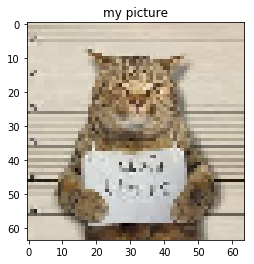

In [71]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.title('my picture')
plt.show()

In [87]:
from IPython.display import Image
import glob
image_list = []
for filename in glob.glob('dataset/single_prediction/*.jpg'): #assuming gif
    im=image.load_img(filename, target_size=(64, 64, 3))
    image_list.append(im)

In [127]:
import numpy as np
images = []
for img in image_list:
    images.append(image.img_to_array(img))
images = np.array(images)

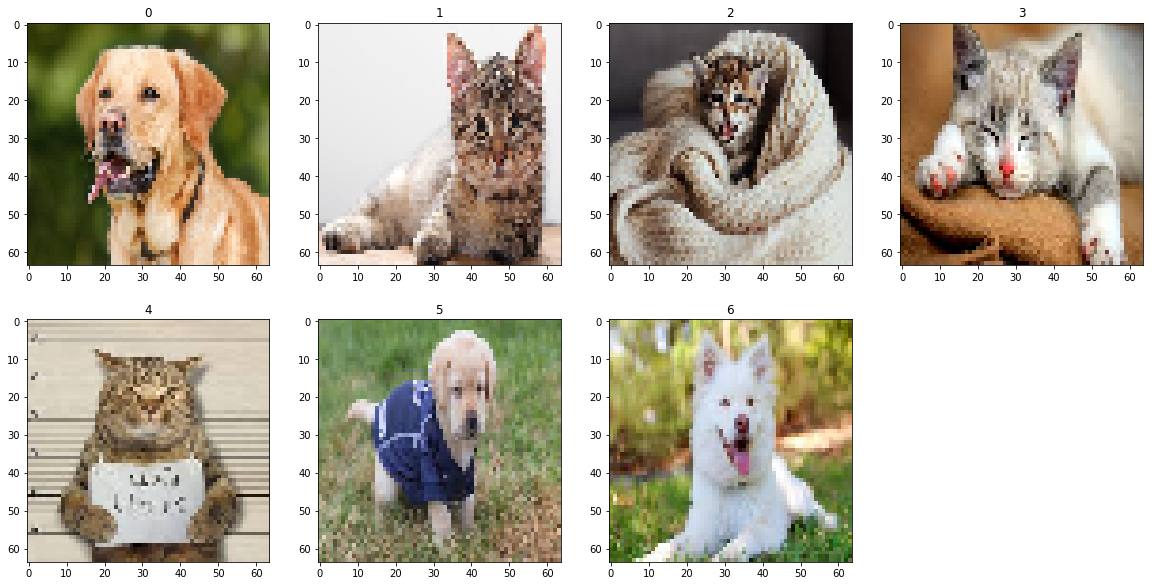

In [165]:
fig = plt.figure(figsize = (20,10))
for idx,img in enumerate(image_list):
    fig.add_subplot(2,4,idx+1)
    plt.imshow(img)
    plt.title(idx)
plt.show()

In [166]:
classifier.predict(images).T

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.6903579e-08, 1.0000000e+00, 9.9351382e-01]], dtype=float32)